In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

import model
from dataset import PathDataset, RandomCutDataset ## cropped dataset
from metrics import jiffs, kagglejiffs
from utils import gen_jilist

In [2]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))

hidden_channels_list = [16, 32, 64, 128, 256]
scale_list           = [(2, 1, 1)]
nblocks              = 2
s_nblocks            = 2
activation           = nn.ReLU()
dropout              = 0.5
partial              = (64, 192) ########################
JNet = model.JNet(hidden_channels_list  = hidden_channels_list ,
                  nblocks               = nblocks              ,
                  s_nblocks             = s_nblocks            ,
                  activation            = activation           ,
                  dropout               = dropout              ,
                  scale_list            = scale_list           ,
                  mu_z                  = 0.2                  ,
                  sig_z                 = 0.2                  ,
                  bet_xy                = 6.                   ,
                  bet_z                 = 35.                  ,
                  superres              = False                ,
                  )
JNet = JNet.to(device = device)
scale = 1
val_dataset   = RandomCutDataset(folderpath  =  'randomdata'     ,  ###
                                 imagename   =  '_x1'            ,
                                 labelname   =  '_label'         ,
                                 size        =  (768, 768, 768)  ,
                                 cropsize    =  (128, 128, 128)  ,
                                 I           =  200              ,
                                 low         =   16              ,
                                 high        =   20              ,
                                 scale       =    1              ,
                                 train       = False             ,
                                )

In [3]:
model_name = 'JNet_77_x1'

In [4]:
jis = []
kjis = []
for i in range(len(val_dataset)):
    image, label = val_dataset[i]
    image   = image.to(device=device).unsqueeze(0)
    pred, _ = JNet(image)
    pred    = pred.to(device='cpu').squeeze(0)
    jis.append(jiffs(pred, label))
    kjis.append(kagglejiffs(pred, label))

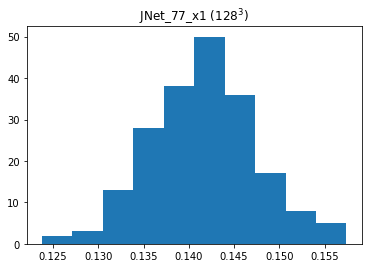

In [5]:
plt.hist(jis)
plt.title(r'{} ($128^3$)'.format(model_name))
plt.show()

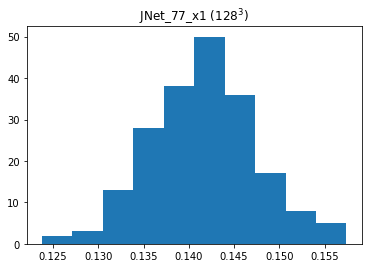

In [6]:
plt.hist(kjis)
plt.title(r'{} ($128^3$)'.format(model_name))
plt.show()

In [7]:
print(np.mean(jis), np.std(jis))
print(np.mean(kjis), np.std(kjis))


0.14153866 0.00578847
0.14153866 0.0057884715


In [ ]:
model_name = 'JNet_81_x1'